<a href="https://colab.research.google.com/github/SANGEETHAPAULRAJ/mypythonsessions/blob/main/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset and split into features and labels
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a simple logistic regression model
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


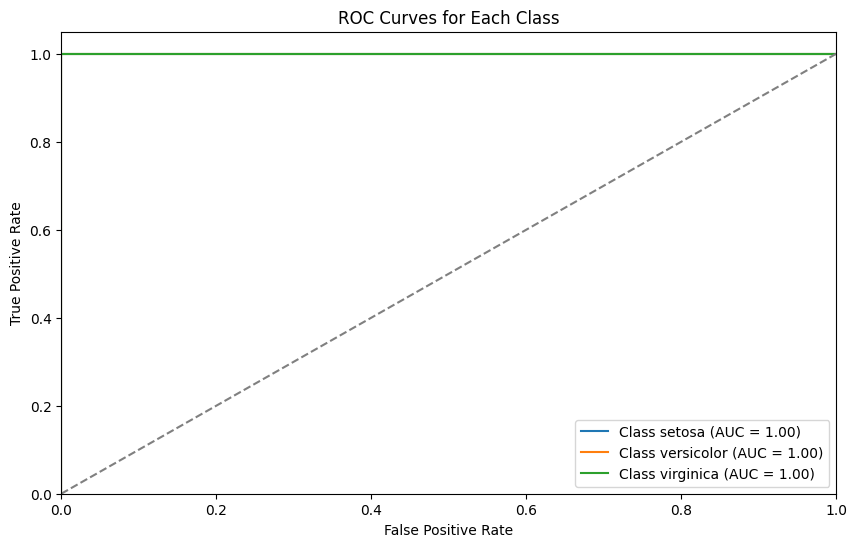

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset and split into features and labels
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a simple logistic regression model
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(data.target_names.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_scores[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(data.target_names.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {data.target_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


In [5]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Initialize a logistic regression model
model = LogisticRegression(max_iter=1000)

# Specify the number of folds for cross-validation
num_folds = 5

# Initialize a k-fold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores for each fold
for fold_idx, score in enumerate(scores, start=1):
    print(f"Fold {fold_idx}: Accuracy = {score:.2f}")

# Calculate and print the average score across all folds
average_score = np.mean(scores)
print(f"Average Accuracy: {average_score:.2f}")


Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 0.93
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.97
Average Accuracy: 0.97


In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Initialize a logistic regression model
model = LogisticRegression()

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation and calculate scores
scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
for fold_idx, score in enumerate(scores, start=1):
    print(f"Sample {fold_idx}: Accuracy = {score:.2f}")

# Calculate and print the average score
average_score = np.mean(scores)
print(f"Average Accuracy: {average_score:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Sample 1: Accuracy = 1.00
Sample 2: Accuracy = 1.00
Sample 3: Accuracy = 1.00
Sample 4: Accuracy = 1.00
Sample 5: Accuracy = 1.00
Sample 6: Accuracy = 1.00
Sample 7: Accuracy = 1.00
Sample 8: Accuracy = 1.00
Sample 9: Accuracy = 1.00
Sample 10: Accuracy = 1.00
Sample 11: Accuracy = 1.00
Sample 12: Accuracy = 1.00
Sample 13: Accuracy = 1.00
Sample 14: Accuracy = 1.00
Sample 15: Accuracy = 1.00
Sample 16: Accuracy = 1.00
Sample 17: Accuracy = 1.00
Sample 18: Accuracy = 1.00
Sample 19: Accuracy = 1.00
Sample 20: Accuracy = 1.00
Sample 21: Accuracy = 1.00
Sample 22: Accuracy = 1.00
Sample 23: Accuracy = 1.00
Sample 24: Accuracy = 1.00
Sample 25: Accuracy = 1.00
Sample 26: Accuracy = 1.00
Sample 27: Accuracy = 1.00
Sample 28: Accuracy = 1.00
Sample 29: Accuracy = 1.00
Sample 30: Accuracy = 1.00
Sample 31: Accuracy = 1.00
Sample 32: Accuracy = 1.00
Sample 33: Accuracy = 1.00
Sample 34: Accuracy = 1.00
Sample 35: Accuracy = 1.00
Sample 36: Accuracy = 1.00
Sample 37: Accuracy = 1.00
Sample 38:

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Initialize a logistic regression model
model = LogisticRegression(max_iter=1000)

# Specify the number of folds for stratified cross-validation
num_folds = 5

# Initialize a stratified k-fold cross-validation splitter
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores
scores = cross_val_score(model, X, y, cv=stratified_kf, scoring='accuracy')

# Print the cross-validation scores for each fold
for fold_idx, score in enumerate(scores, start=1):
    print(f"Fold {fold_idx}: Accuracy = {score:.2f}")

# Calculate and print the average score across all folds
average_score = np.mean(scores)
print(f"Average Accuracy: {average_score:.2f}")


Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 0.97
Fold 3: Accuracy = 0.93
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 0.93
Average Accuracy: 0.97


In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize SVM classifier
svm = SVC()

# Initialize Grid Search
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.975


In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distribution for random search
param_dist = {'C': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf']}

# Initialize SVM classifier
svm = SVC()

# Initialize Random Search
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Perform Random Search
random_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 1.0}
Best Accuracy: 0.975
